In [6]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

# 회귀분석 (주관식, Python보다 성능이 좋다)
- Y = aX + b => 단순회귀분석

In [7]:
regression <- read.csv("Data/regression.csv")
head(regression)
tail(regression)
str(regression)
summary(regression)

,age,Height,Weight
,<chr>,<dbl>,<dbl>
1,0~3Months,59.1,5.9
2,3~6Months,66.7,8.0
3,6~9Months,71.4,8.9
4,9~12Months,75.0,10.1
5,12~18Months,80.1,10.9
6,2Year,87.8,13.2


,age,Height,Weight
,<chr>,<dbl>,<dbl>
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


'data.frame':	31 obs. of  3 variables:
 $ age   : chr  "0~3Months" "3~6Months" "6~9Months" "9~12Months" ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


     age                Height          Weight     
 Length:31          Min.   : 59.1   Min.   : 5.90  
 Class :character   1st Qu.:105.7   1st Qu.:17.90  
 Mode  :character   Median :150.7   Median :45.20  
                    Mean   :135.8   Mean   :42.62  
                    3rd Qu.:169.8   3rd Qu.:66.65  
                    Max.   :173.8   Max.   :72.30  

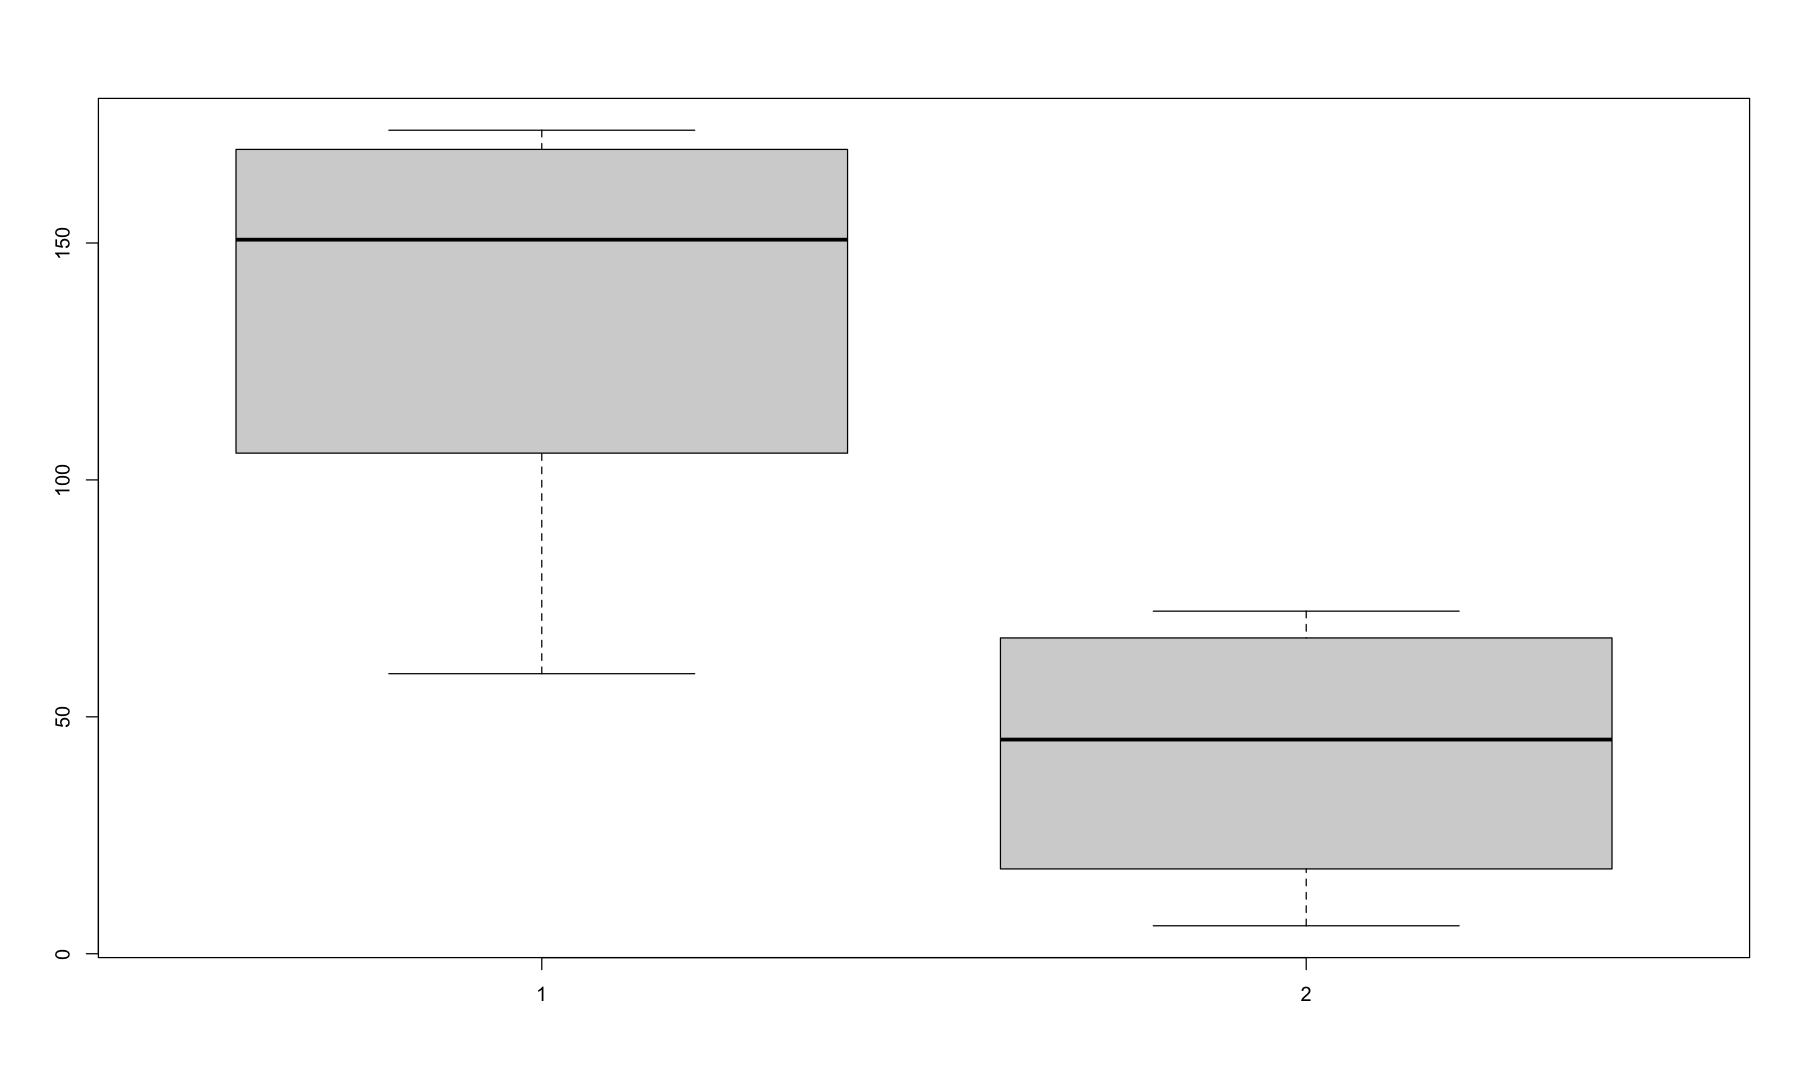

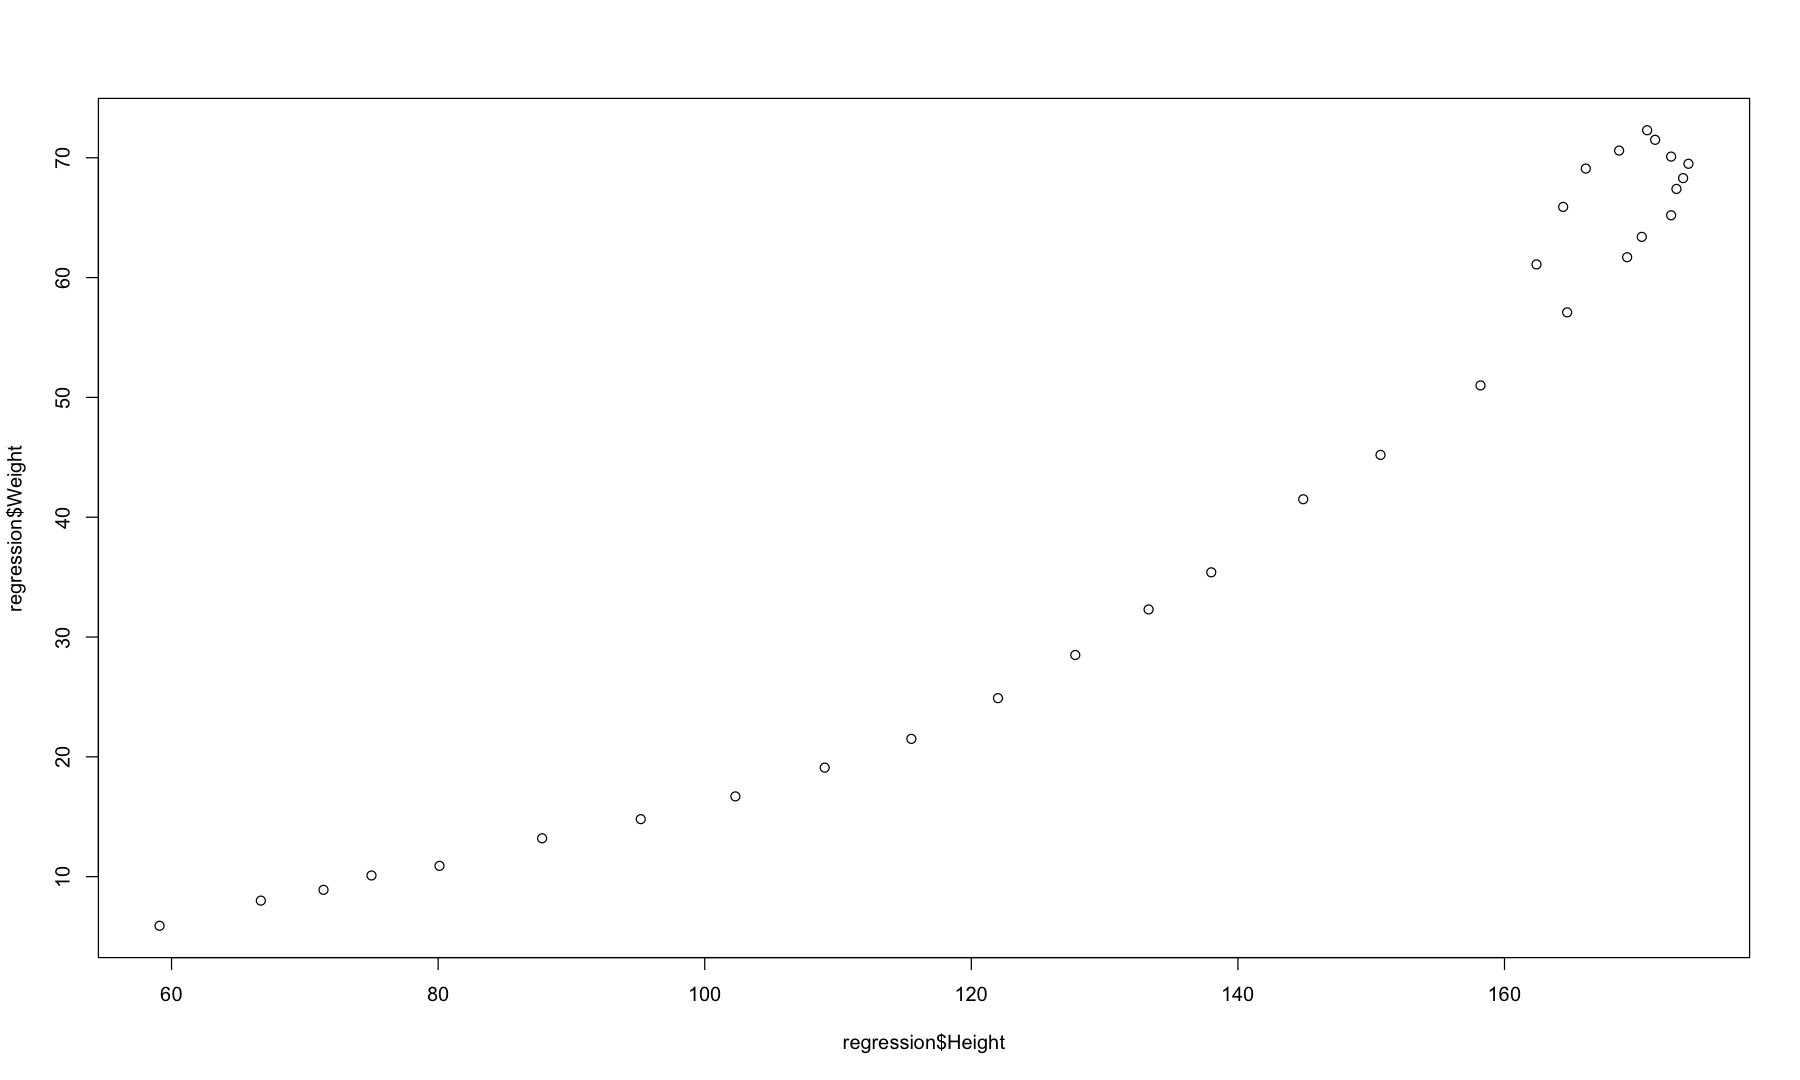

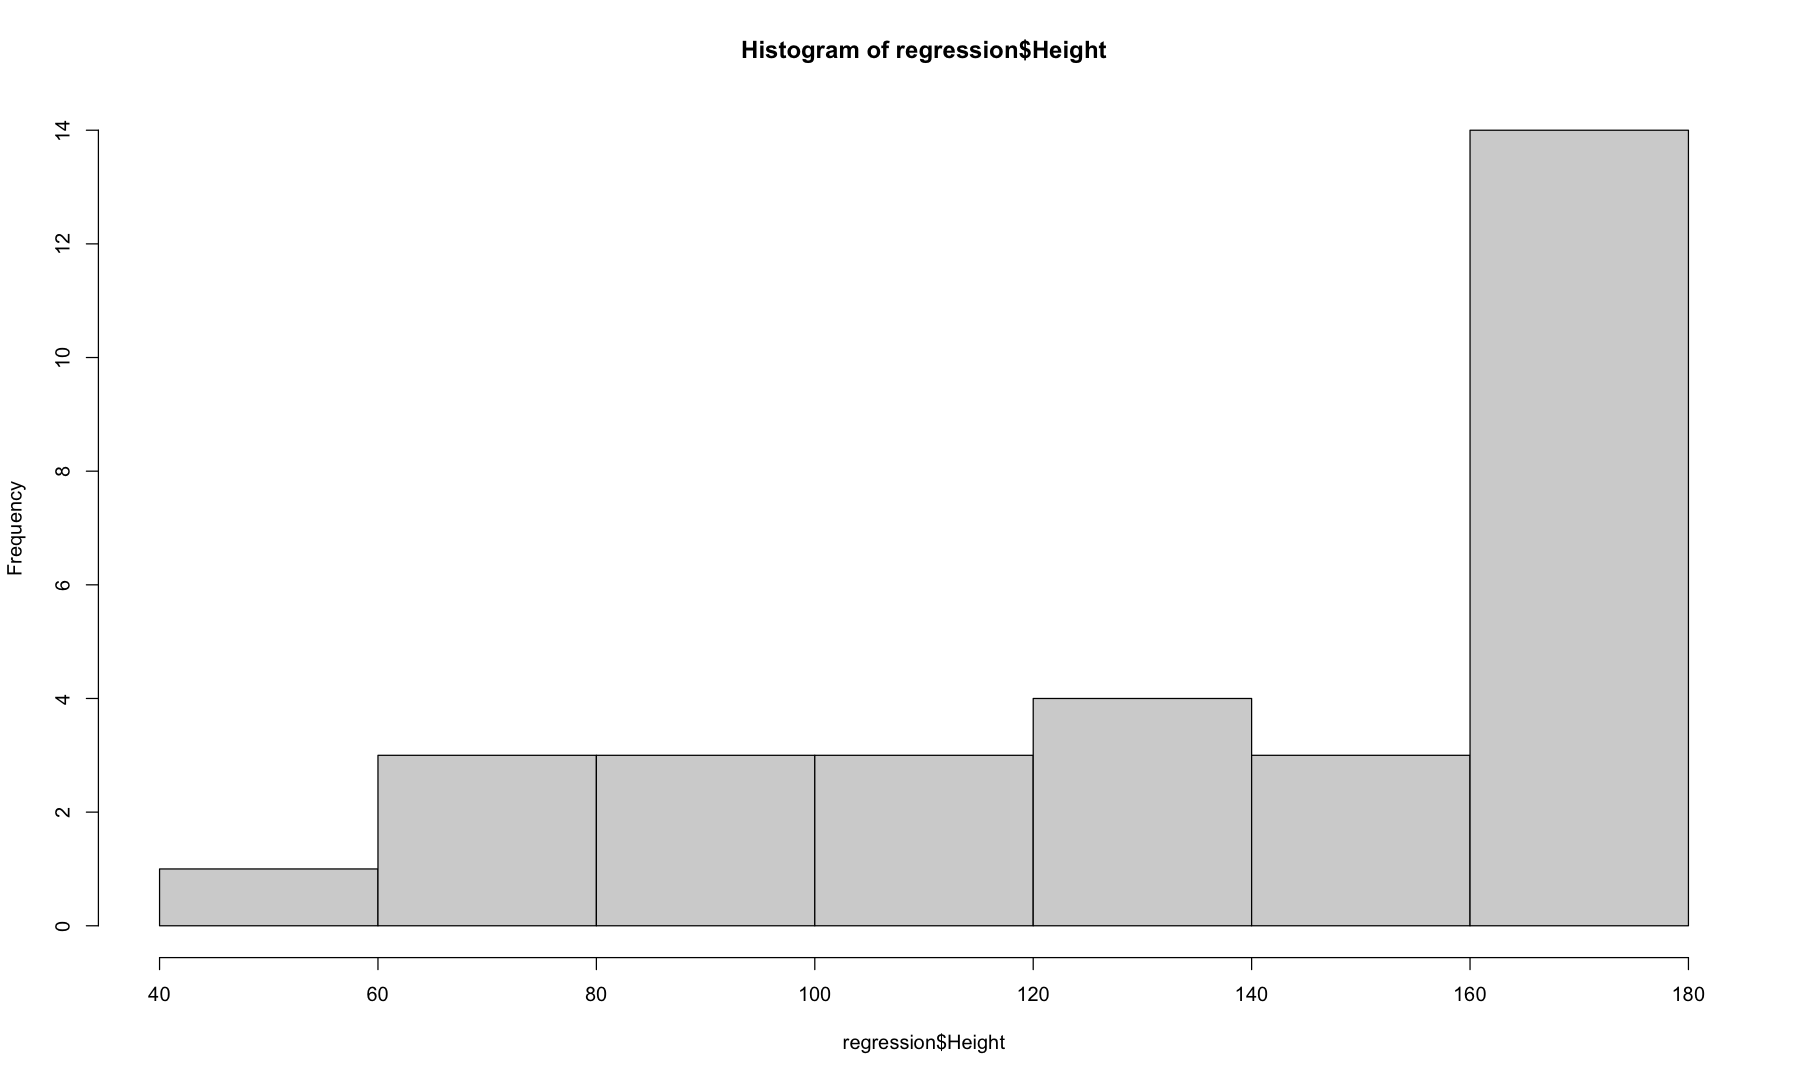

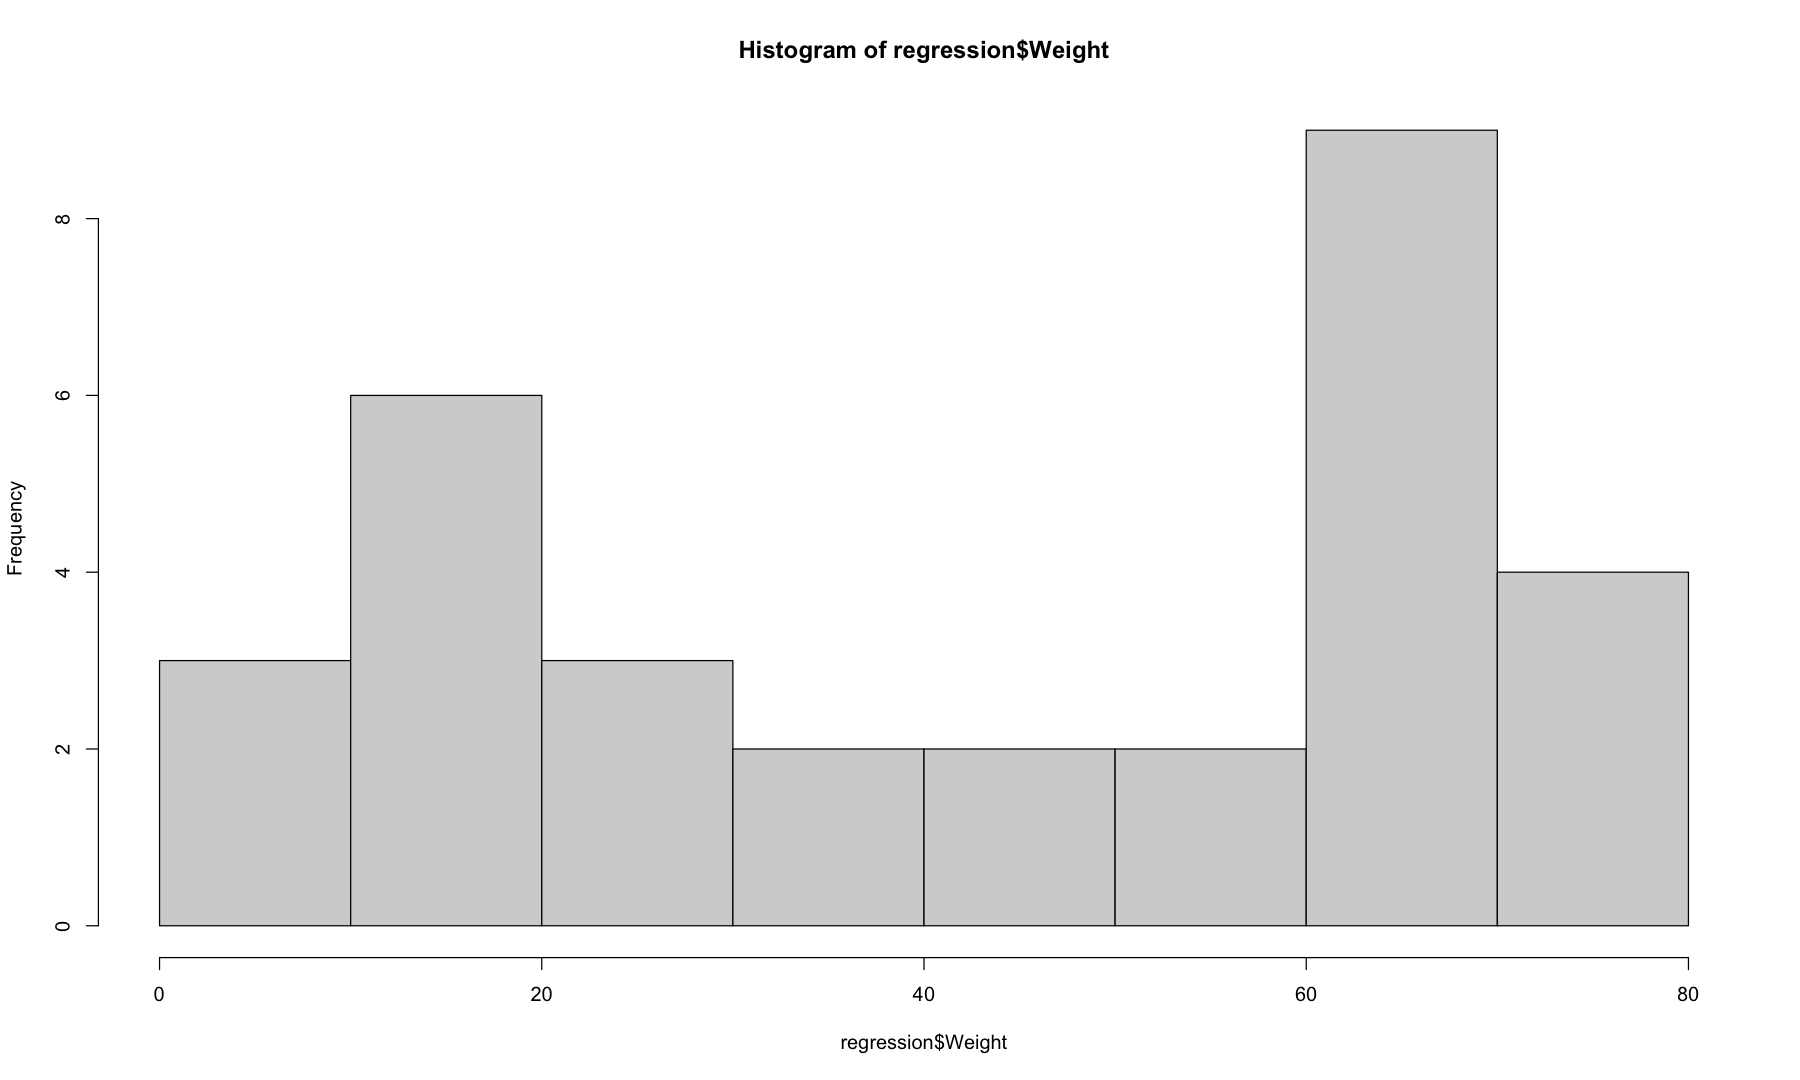

In [8]:
par(bg = 'white')

boxplot(regression$Height,regression$Weight)
plot(regression$Height,regression$Weight)
hist(regression$Height)
hist(regression$Weight)

In [9]:
# 상관계수
cor(regression$Height,regression$Weight) # 0.9672

[1] 0.9672103

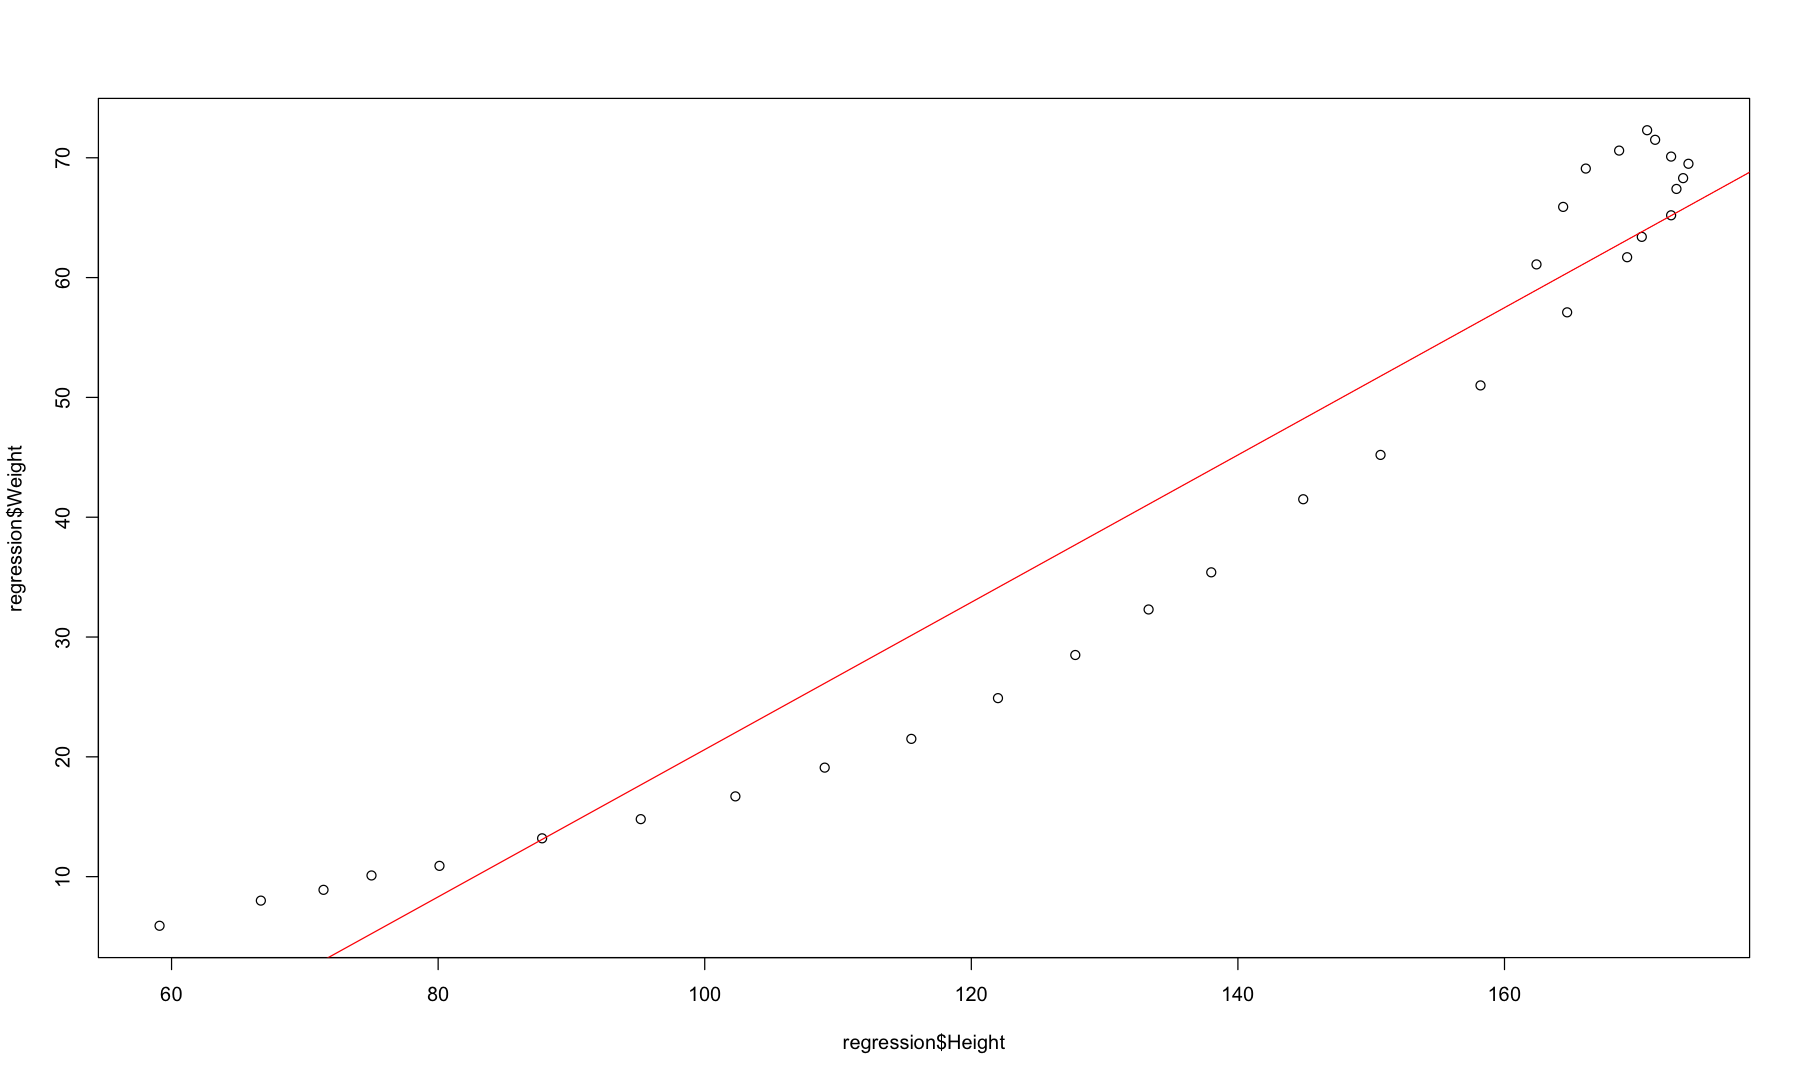

In [10]:
# 회귀선(중심선, 평균선)
par(bg = 'white')
plot(regression$Weight ~ regression$Height)

# 회귀식
r <- lm(regression$Weight ~ regression$Height)
abline(r, col='red')

잔차 : 데이터와 예측값의 차이

In [11]:
# 분석 결과
summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666       0.000000000142 ***
regression$Height   0.61474    0.02998  20.508 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 0.00000000000000022


p-value: < 2.2e-16 < 0.05<br>
Adjusted R-squared: 0.9333  =>  예측력<br>
Residual standard error: 6.355  =>  표준오차<br>

y = ax + b
몸무게 = 0.6149 * 키 + (-40.86594)

In [12]:
# 키가 170인 사람의 몸무게
0.6149 * 170 + (-40.86594)

# 표준오차를 적용한 키가 170인 사람의 몸무게
cat(0.6149 * 170 + (-40.86594) - 6.355,"~",0.6149 * 170 + (-40.86594) + 6.355)

[1] 63.66706

57.31206 ~ 70.02206

# IQ

In [13]:
iq <- read.csv("Data/iq.csv")
head(iq)


,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
,<chr>,<int>,<int>,<int>,<int>,<int>
1,A,90,140,2,1,0
2,B,75,125,1,3,3
3,C,77,120,1,0,4
4,D,83,135,2,3,2
5,E,65,105,0,4,4
6,F,80,123,3,1,1


### (1) 성적과 가장 관련이 깊은 항목은?

In [14]:
cor(iq$성적, iq$IQ)
cor(iq$성적, iq$다니는.학원수)
cor(iq$성적, iq$게임하는.시간)
cor(iq$성적, iq$TV시청.시간)

cor(iq[-1])

[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


> 성적과 가장 관계가 깊은 항목은 IQ 이다.

### (2) IQ가 126이 사람의 성적을 예측해 보세요.

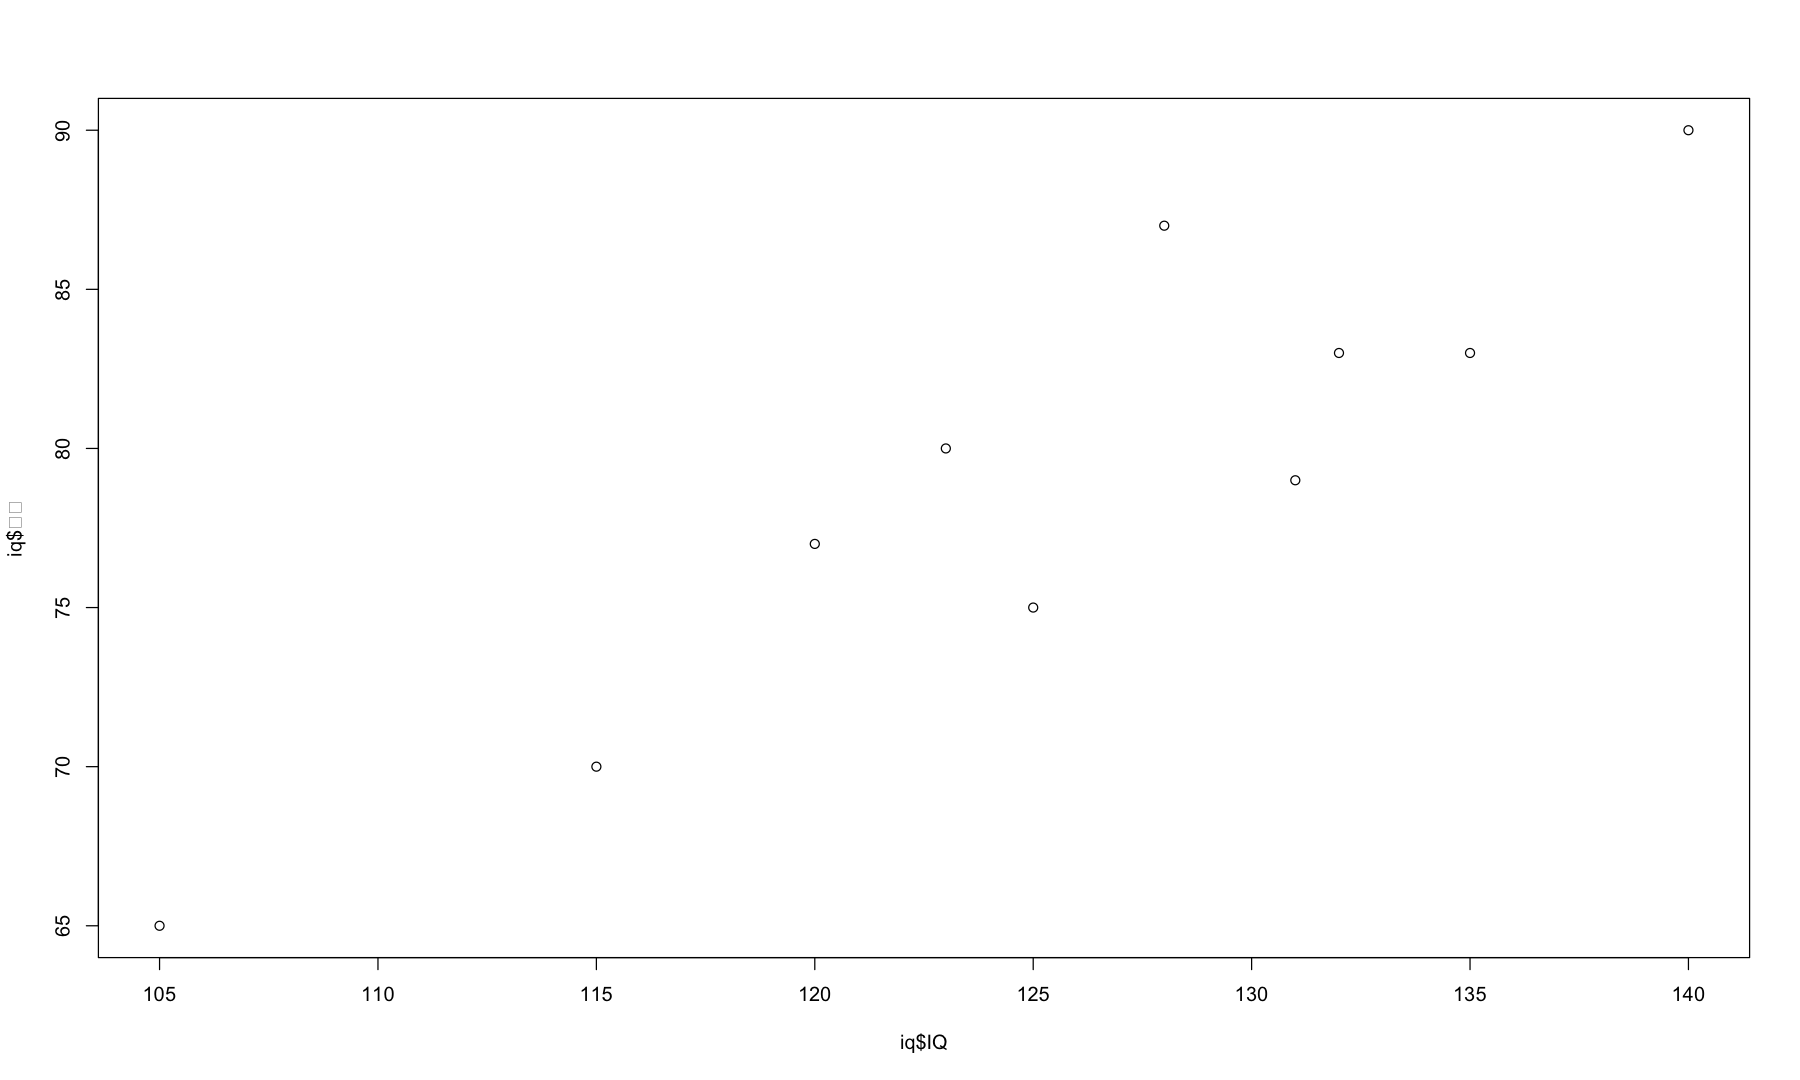

In [15]:
par(bg = 'white')
plot(
    iq$성적~iq$IQ
)
abline(r,col='red')

In [16]:
r <- lm(iq$성적 ~ iq$IQ)

In [17]:
summary(r)


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


표준오차 : 3.322<br>
예측률 : 0.8071

In [18]:
cat(0.6714*126 - 5.2918 - 3.322, "~" ,0.6714*126 - 5.2918 + 3.322)

75.9826 ~ 82.6266

> IQ가 126인 사람의 성적 : 75.9826 ~ 82.6266

In [82]:
r_1 <- function(a,b) {
   cor(a,b)
   par(bg = 'white')
   plot(a~b)
   abline(lm(a~b), col='red')
   summary(lm(a~b))
}

r_1result <- function(a,b,c) {
    cat(summary(lm(a ~ b))$coefficient[2,1],"* X값 +", summary(lm(a ~ b))$coefficient[1,1] - summary(lm(a ~ b))$sigma, 
       "~",
       summary(lm(a ~ b))$coefficient[2,1],"* X값 +" , summary(lm(a ~ b))$coefficient[1,1] + summary(lm(a ~ b))$sigma)

    cat("\n",summary(lm(a ~ b))$coefficient[2,1]*c + summary(lm(a ~ b))$coefficient[1,1] - summary(lm(a ~ b))$sigma)
    cat("\n",summary(lm(a ~ b))$coefficient[2,1]*c + summary(lm(a ~ b))$coefficient[1,1] + summary(lm(a ~ b))$sigma)
}

### (3) 학원을 몇군데 다녀야 성적이 90점 이상이 될까?


Call:
lm(formula = a ~ b)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
b            0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


0.1241018 * X값 + -8.679815 ~ 0.1241018 * X값 + -7.103443
 2.489344
 4.065716

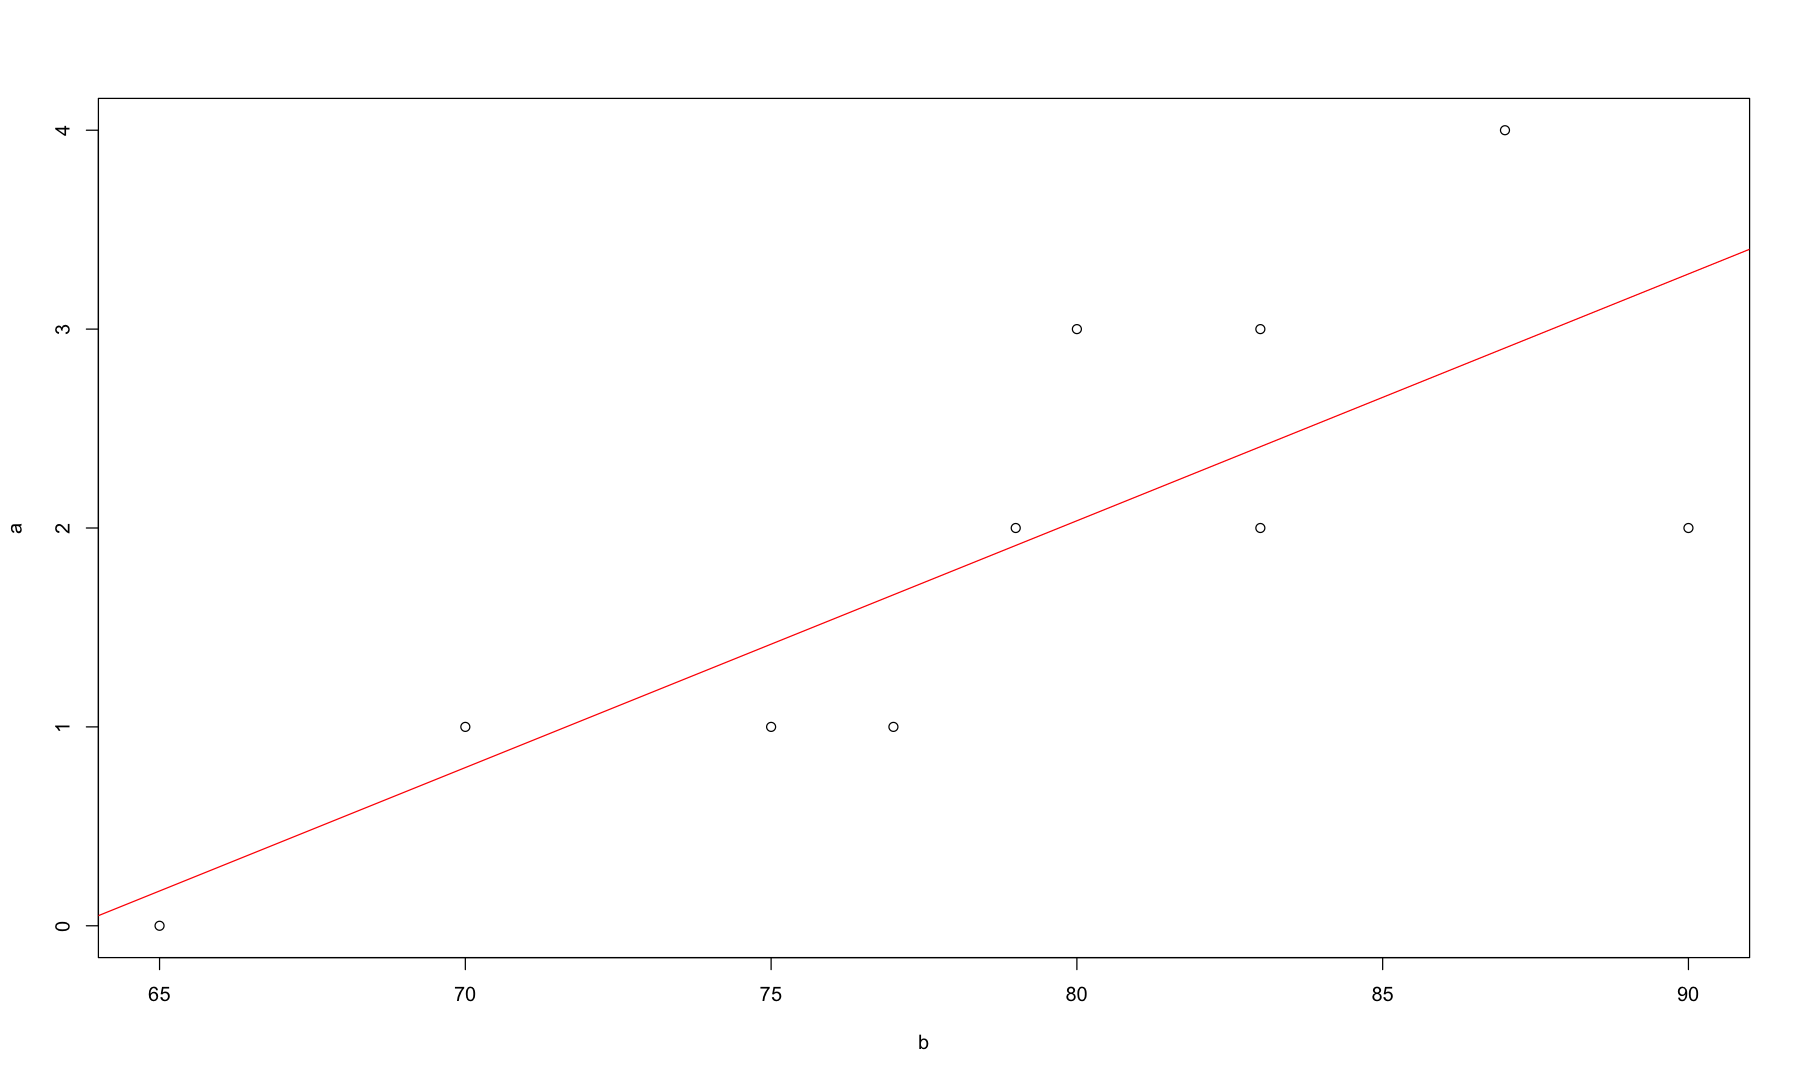

In [83]:
r_1(iq$다니는.학원수,iq$성적)
r_1result(iq$다니는.학원수,iq$성적,90)

In [28]:
cat(0.12410*90 -7.89163 - 0.7882,"~",0.12410*90 -7.89163 + 0.7882)

2.48917 ~ 4.06557

### 성적이 85점이라면, IQ는 얼마 이상?


Call:
lm(formula = a ~ b)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
b             1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


1.234026 *B + 23.53118 ~ 1.234026 *B + 32.53951
 128.4234
 137.4317

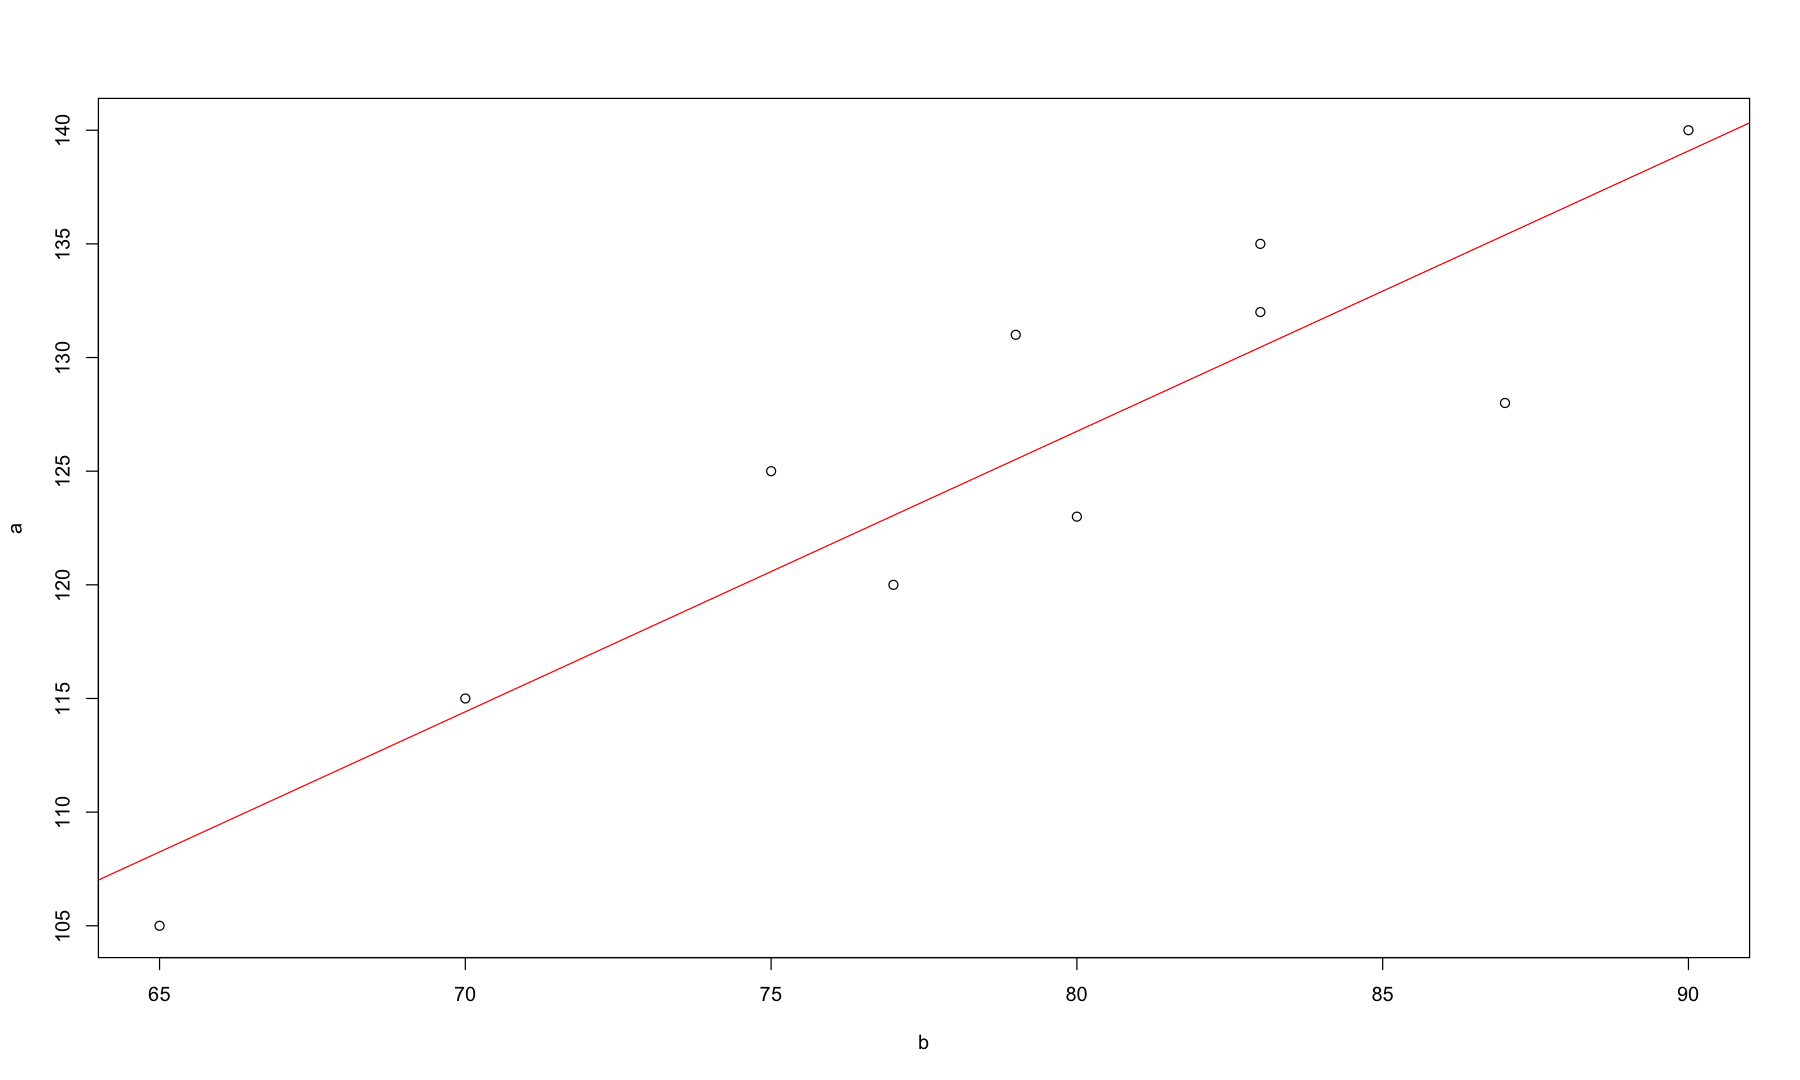

In [80]:
r_1(iq$IQ, iq$성적)
r_1result(iq$IQ, iq$성적,85)

In [25]:
# iq = 1.234*성적 + 28.0353 +- 4.504

cat(1.234*85 + 28.0353 - 4.504,"~",1.234*85 + 28.0353 + 4.504)

128.4213 ~ 137.4293